## 확률과 통계 Term Project
#### 제출자: 오지원
#### 학번: 202431541
#### 날짜: 20250603

## 1. 데이터 탐색 및 전처리

In [4]:
import pandas as pd  # pandas 라이브러리를 불러옵니다(데이터 분석용).

# CSV 파일을 읽어와 데이터프레임(df)으로 저장합니다.
df = pd.read_csv('/Users/jw/statsql/tmdb_5000_movies.csv')

# 분석에 사용할 컬럼(변수) 목록을 지정합니다.
cols = ['revenue', 'budget', 'runtime', 'vote_average', 'vote_count', 'popularity']

# 지정한 컬럼만 추출하여 df를 다시 만듭니다.
df = df[cols]

# 데이터프레임의 상위 5개 행을 출력해 데이터가 잘 불러와졌는지 확인합니다.
df.head()

,revenue,budget,runtime,vote_average,vote_count,popularity
0,2787965087,237000000,162.0,7.2,11800,150.437577
1,961000000,300000000,169.0,6.9,4500,139.082615
2,880674609,245000000,148.0,6.3,4466,107.376788
3,1084939099,250000000,165.0,7.6,9106,112.312950
4,284139100,260000000,132.0,6.1,2124,43.926995


In [9]:
# 데이터프레임(df)의 각 열(변수)에 대한 기초 통계량(평균, 표준편차, 최소/최대값, 사분위수 등)을 요약해서 보여줍니다.
df.describe()

,revenue,budget,runtime,vote_average,vote_count,popularity
count,4.803000e+03,4.803000e+03,4801.000000,4803.000000,4803.000000,4803.000000
mean,8.226064e+07,2.904504e+07,106.875859,6.092172,690.217989,21.492301
std,1.628571e+08,4.072239e+07,22.611935,1.194612,1234.585891,31.816650
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,7.900000e+05,94.000000,5.600000,54.000000,4.668070
50%,1.917000e+07,1.500000e+07,103.000000,6.200000,235.000000,12.921594
75%,9.291719e+07,4.000000e+07,118.000000,6.800000,737.000000,28.313505
max,2.787965e+09,3.800000e+08,338.000000,10.000000,13752.000000,875.581305


In [7]:
# 분석에 사용할 컬럼만 추출하여 새로운 데이터프레임(df_selected)로 만듭니다.
df_selected = df[cols]

# 결측치 처리 전 데이터의 행과 열의 개수를 출력합니다.
print("결측치 처리 전 데이터 크기:", df_selected.shape)

# 결측치가 포함된 행의 개수를 출력합니다.
print("결측치가 있는 행 수:", df_selected.isnull().any(axis=1).sum())

# 결측치가 포함된 행을 화면에 표시합니다.
display(df_selected[df_selected.isnull().any(axis=1)])

# 결측치가 있는 행을 모두 제거합니다.
df_selected = df_selected.dropna()

# 결측치 처리 후 데이터의 행과 열의 개수를 출력합니다.
print("결측치 처리 후 데이터 크기:", df_selected.shape)

결측치 처리 전 데이터 크기: (4803, 6)
결측치가 있는 행 수: 2


,revenue,budget,runtime,vote_average,vote_count,popularity
2656,0,15000000,NaN,7.3,12,0.738646
4140,0,2,NaN,0.0,0,0.050625


결측치 처리 후 데이터 크기: (4801, 6)


## 2. 기술통계량 분석

In [11]:
print("평균(mean):")  # 각 변수(컬럼)의 평균값을 출력합니다.
print(df_selected.mean())

print("\n중앙값(median):")  # 각 변수의 중앙값(중위수)을 출력합니다.
print(df_selected.median())

print("\n표준편차(std):")  # 각 변수의 표준편차를 출력합니다.
print(df_selected.std())

평균(mean):
revenue         8.229491e+07
budget          2.905402e+07
runtime         1.068759e+02
vote_average    6.093189e+00
vote_count      6.905030e+02
popularity      2.150109e+01
dtype: float64

중앙값(median):
revenue         1.917997e+07
budget          1.500000e+07
runtime         1.030000e+02
vote_average    6.200000e+00
vote_count      2.360000e+02
popularity      1.292827e+01
dtype: float64

표준편차(std):
revenue         1.628824e+08
budget          4.072821e+07
runtime         2.261193e+01
vote_average    1.191493e+00
vote_count      1.234764e+03
popularity      3.182036e+01
dtype: float64


In [6]:
input_vars = ['budget', 'runtime', 'vote_average', 'vote_count', 'popularity']

# 각 입력 변수와 revenue(수익) 간의 상관계수를 계산하여 출력합니다.
for var in input_vars:
    corr = df_selected['revenue'].corr(df_selected[var])
    print(f"revenue와 {var}의 상관계수: {corr:.4f}")  # 상관계수는 두 변수 간의 선형관계 강도를 나타냅니다.
    
# 상관계수가 1에 가까울수록 양의 선형관계, -1에 가까울수록 음의 선형관계, 0에 가까울수록 선형관계가 약함을 의미한다.
# vote_count (0.7815) 및 budget (0.7308): 이 변수들은 revenue와 강한 양의 선형 관계를 보인다. 
# 즉, 투표 수가 많거나 제작 예산이 높은 영화일수록 revenue(수입)가 높아지는 경향이 강하게 나타난다.
# popularity (0.6447): popularity는 revenue와 중간에서 강한 정도의 양의 선형 관계를 가진다. 
# 인기가 많은 영화일수록 revenue도 높은 경향이 있다.
# runtime (0.2511) 및 vote_average (0.1973): 이 변수들은 revenue와 약한 양의 선형 관계를 보인다. 
# 영화의 상영 시간이나 평균 평점은 revenue와 관련이 있지만, 그 관계의 강도는 budget, vote_count, popularity에 비해 매우 약하다. 
# 즉, 상영 시간이 길거나 평점이 높다고 해서 반드시 revenue가 크게 높아지는 것은 아니다.

NameError: name 'df_selected' is not defined

## 3. 이상치 탐색 및 시각화

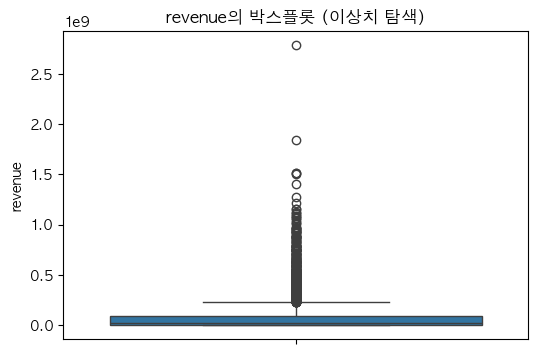

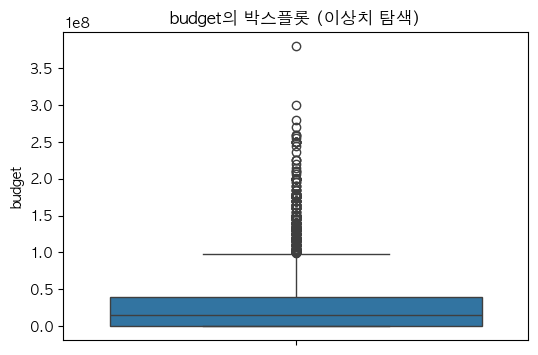

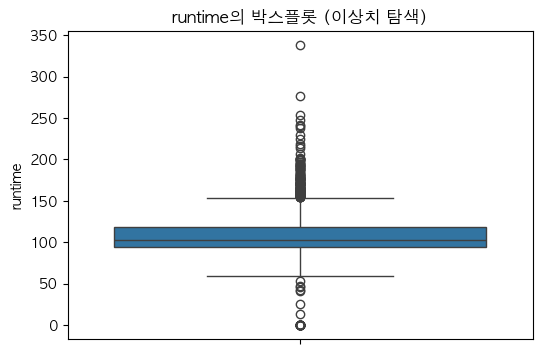

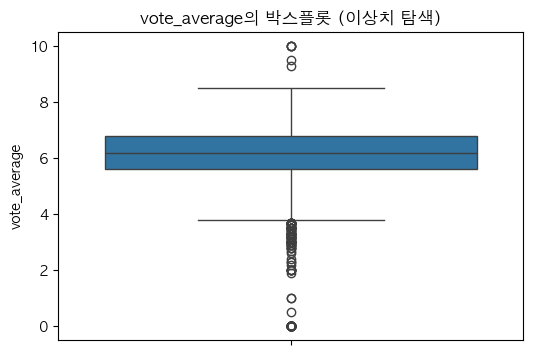

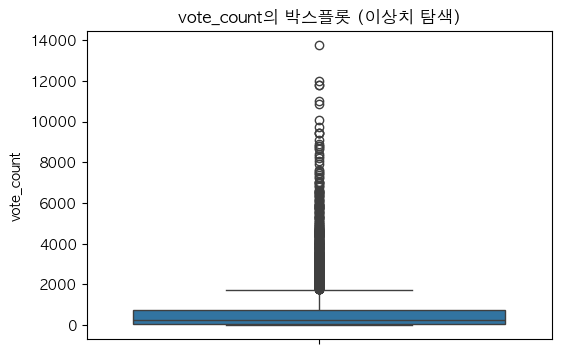

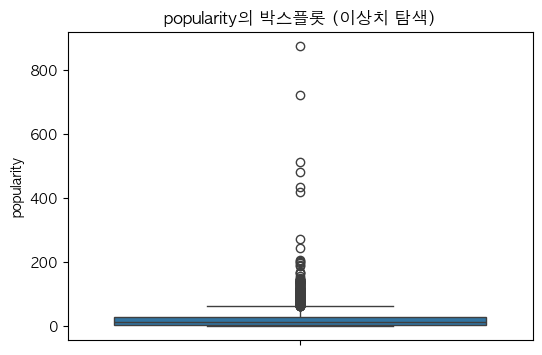

In [8]:

import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Mac: 'AppleGothic', Windows: 'Malgun Gothic')
plt.rcParams['font.family'] = 'AppleGothic'  # 그래프에서 한글이 깨지지 않도록 폰트 설정
plt.rcParams['axes.unicode_minus'] = False   # 마이너스(-) 기호가 깨지지 않도록 설정

# 각 변수별로 박스플롯을 그려 이상치(Outlier)를 시각적으로 탐색합니다.
for col in df_selected.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df_selected[col])
    plt.title(f'{col}의 박스플롯 (이상치 탐색)')
    plt.show()

In [18]:
# 각 변수별 극단 이상치(Extreme Outlier) 탐색
# 극단 이상치는 Q1 - 3*IQR 미만 또는 Q3 + 3*IQR 초과로 정의

for col in df_selected.columns:
    # 각 변수의 1사분위수(Q1)와 3사분위수(Q3)를 계산합니다.
    Q1 = df_selected[col].quantile(0.25)
    Q3 = df_selected[col].quantile(0.75)
    IQR = Q3 - Q1  # IQR(사분위 범위) 계산

    # 극단 이상치 기준값을 계산합니다.
    lower_extreme = Q1 - 3 * IQR
    upper_extreme = Q3 + 3 * IQR

    # 극단 이상치에 해당하는 값을 추출합니다.
    extreme_outliers = df_selected[(df_selected[col] < lower_extreme) | (df_selected[col] > upper_extreme)][col]

    print(f"{col} 극단 이상치 개수: {len(extreme_outliers)}")
    if len(extreme_outliers) > 0:
        print(f"{col} 극단 이상치 값 예시: {extreme_outliers.values[:5]}")

revenue 극단 이상치 개수: 236
revenue 극단 이상치 값 예시: [2787965087  961000000  880674609 1084939099  890871626]
budget 극단 이상치 개수: 100
budget 극단 이상치 값 예시: [237000000 300000000 245000000 250000000 260000000]
runtime 극단 이상치 개수: 68
runtime 극단 이상치 값 예시: [194. 201. 191. 214. 191.]
vote_average 극단 이상치 개수: 66
vote_average 극단 이상치 값 예시: [0.  1.9 0.5 0.  0. ]
vote_count 극단 이상치 개수: 282
vote_count 극단 이상치 값 예시: [11800  4500  4466  9106  3576]
popularity 극단 이상치 개수: 95
popularity 극단 이상치 값 예시: [150.437577 139.082615 107.376788 112.31295  115.699814]


데이터의 상자 그림을 확인하며 budget과 revenu변수에 0 값이 20% 이상을 차지한다는 것을 알게 되었다. 단순 누락으로 생각했지만, 데이터를 확인해 보니 금액의 단위가 million이기 때문에 적은 단위의 금액은 0으로 처리된 것을 확인할 수 있었다.
이때, 실제로는 다양한 (0 초과, 1백만 달러 미만의) 예산을 가진 영화들이 모두 0으로 처리되면, 예산과 수익 간의 실제 관계가 왜곡될 수 있다. 모델은 예산이 매우 낮은 영화들의 수익성을 제대로 학습하지 못하거나, 심지어 예산이 0일 때의 수익 0이라는 비현실적인 해석을 내놓을 수 있다.
이러한 0값들을 보다 현실적인 값으로 대체하기 위해, '백만 달러 미만'을 대표할 수 있는 값으로 0.5 (즉, 0.5백만 달러)를 일괄적으로 사용하기로 결정했다. 이 방법은 모든 '백만 달러 미만' 영화에 동일한 값을 부여하게 되어 실제 해당 범위 내 예산/수익의 다양성을 완벽히 반영하지는 못한다는 한계가 있다. 하지만, 해당 구간의 정확한 분포를 알 수 없는 상황에서 이는 합리적인 추정치로 작용할 수 있으며, 0으로 두는 것보다는 모델에 더 유의미한 정보를 제공할 것으로 기대된다.

runtime에 존재하는 0값 2개는 변수의 의미를 생각했을 때 오류,또는 결측치로 생각되기 때문에 삭제한다.
 
위에서 언급된 0값 처리 외에도 이상치가 존재한다. 이러한 이상치들은 분석 결과, 특히 회귀 모델의 계수 추정에 과도한 영향을 미쳐 결과를 왜곡시킬 수 있다. 이때, 일반 이상치가 전체 데이터의 30%정도 차지하는 변수도 있기 때문에 데이터 원본의 훼손을 최소화하며 분석의 신뢰도를 위해 극단 이상치만을 보정한다. 
단순 제거하는 것은 정보 손실로 이어질 수 있기 때문에 윈저라이제이션(Winsorization) 기법을 적용한다. 윈저라이제이션은 데이터의 특정 하위 백분위수보다 작은 값들을 해당 하위 백분위수 값으로, 특정 상위 백분위수보다 큰 값들을 해당 상위 백분위수 값으로 대체하는 방법이다. 예를 들어, 하위 1%와 상위 99%를 기준으로 설정할 수 있다.
이를 통해 극단값의 영향을 완화하면서도 데이터의 분포 특성을 최대한 보존하여, 모델의 안정성과 신뢰성을 높이고 해석 가능성을 개선할 수 있을 것으로 기대된다. 

In [9]:
import numpy as np

df_winsor = df_selected.copy()

# budget, revenue 컬럼을 float형으로 변환
df_winsor['budget'] = df_winsor['budget'].astype(float)
df_winsor['revenue'] = df_winsor['revenue'].astype(float)

# budget, revenue가 0인 값을 0.5로 대체
df_winsor.loc[df_winsor['budget'] == 0, 'budget'] = 0.5
df_winsor.loc[df_winsor['revenue'] == 0, 'revenue'] = 0.5

# runtime이 0보다 큰 데이터만 남깁니다.
df_winsor = df_winsor[df_winsor['runtime'] > 0]

# 모든 변수에 대해 IQR 기반 Winsorization 적용
for col in df_winsor.columns:
    Q1 = df_winsor[col].quantile(0.25)
    Q3 = df_winsor[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_extreme = Q1 - 3 * IQR
    upper_extreme = Q3 + 3 * IQR
    df_winsor[col] = np.where(df_winsor[col] < lower_extreme, lower_extreme, df_winsor[col])
    df_winsor[col] = np.where(df_winsor[col] > upper_extreme, upper_extreme, df_winsor[col])

## 4. 시각화

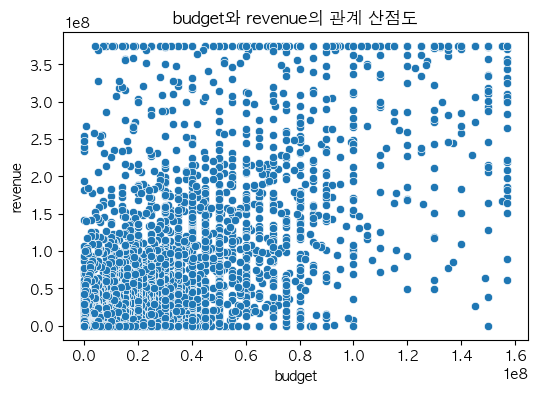

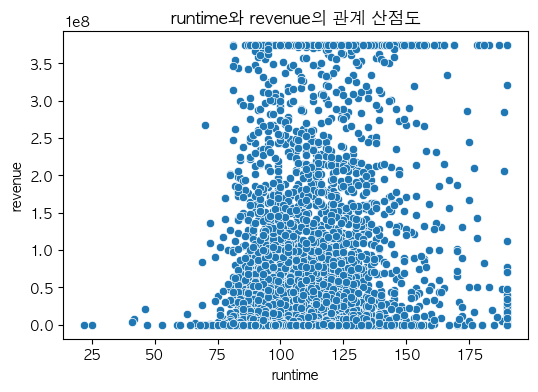

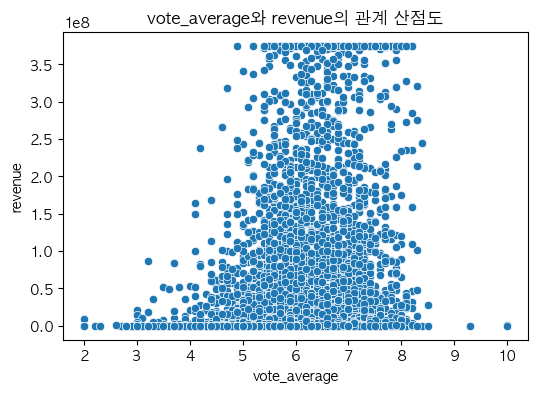

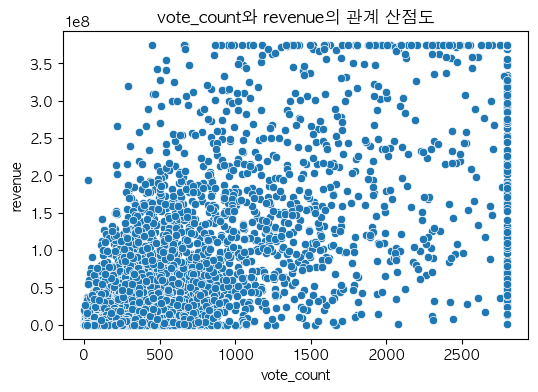

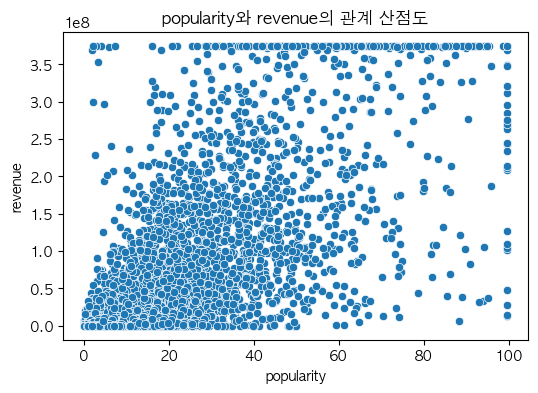

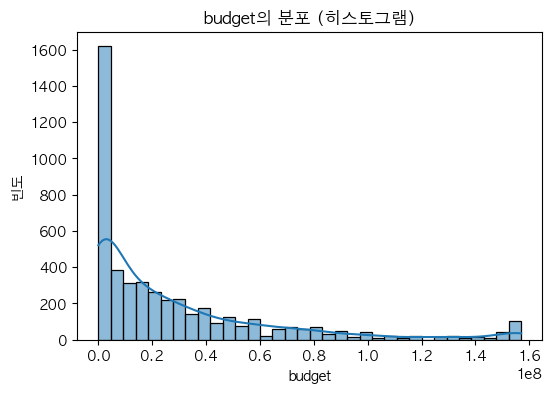

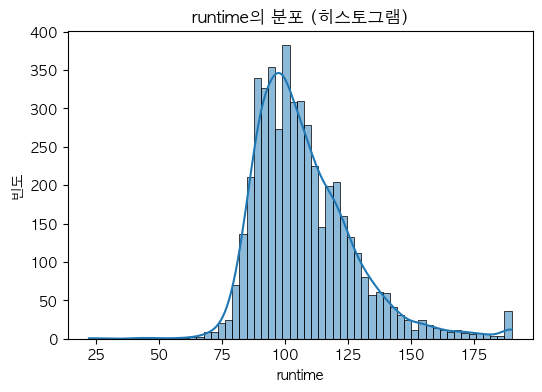

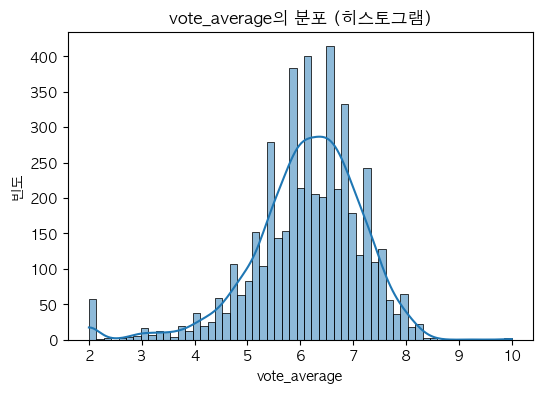

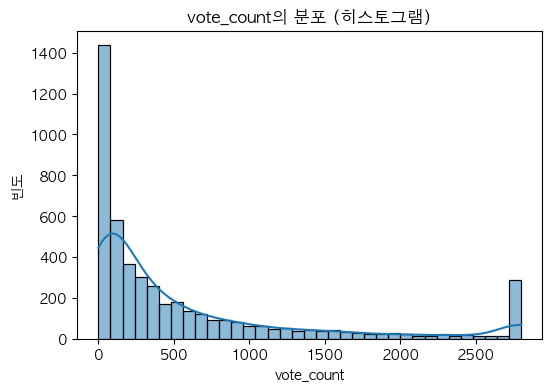

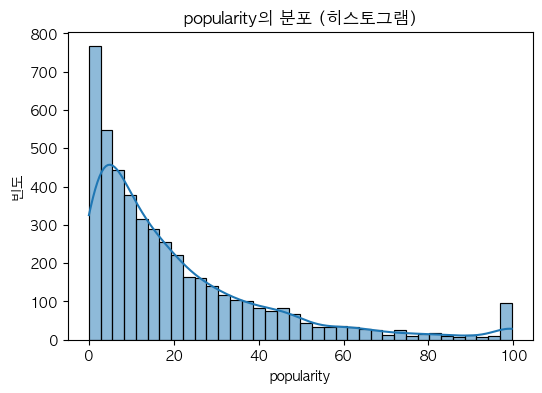

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

input_vars = ['budget', 'runtime', 'vote_average', 'vote_count', 'popularity']

# 1. 산점도: 각 입력변수와 revenue의 관계
for var in input_vars:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df_winsor[var], y=df_winsor['revenue'])
    plt.title(f'{var}와 revenue의 관계 산점도')
    plt.xlabel(var)
    plt.ylabel('revenue')
    plt.show()

# 2. 히스토그램: 각 입력변수의 분포
for var in input_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_winsor[var], kde=True)
    plt.title(f'{var}의 분포 (히스토그램)')
    plt.xlabel(var)
    plt.ylabel('빈도')
    plt.show()

## 5. 회귀분석

In [ ]:
import statsmodels.api as sm

input_vars = ['budget', 'runtime', 'vote_average', 'vote_count', 'popularity']

# 각 입력 변수별로 revenue에 대한 단순회귀분석을 수행합니다.
for var in input_vars:
    X = df_winsor[[var]]
    X = sm.add_constant(X)  # 상수항 추가
    y = df_winsor['revenue']
    model = sm.OLS(y, X).fit()
    print(f"\n--- {var}로 revenue 예측 단순회귀 결과 ---")
    print(model.summary())

1. 회귀계수 해석 (기울기)



(1) budget
$$
\text{revenue} = 9,860,000 + 2.0945 \cdot \text{budget}
$$


(2) runtime
$$
\text{revenue} = -81,970,000 + 1,407,000 \cdot \text{runtime}
$$


(3) vote\_average
$$
\text{revenue} = -65,870,000 + 22,030,000 \cdot \text{vote\_average}
$$


(4) vote\_count
$$
\text{revenue} = 8,676,000 + 104,000 \cdot \text{vote\_count}
$$


(5) popularity
$$
\text{revenue} = -3,598,000 + 3,557,000 \cdot \text{popularity}
$$





| 변수             | 기울기 `b` (회귀계수) | 의미                          |
| -------------- | -------------- | --------------------------- |
| `budget`       | 2.0945         | 예산이 1 증가하면 수익 약 2.09 증가     |
| `runtime`      | 1,407,000      | 러닝타임 1분 증가 → 수익 약 140.7만 증가 |
| `vote_average` | 22,030,000     | 평점 1점 증가 → 수익 약 2,203만 증가   |
| `vote_count`   | 104,000        | 투표 수 1 증가 → 수익 약 10.4만 증가   |
| `popularity`   | 3,557,000      | 인기도 1 증가 → 수익 약 355.7만 증가   |
  

vote_average는 값이 크기 때문에 작은 변화에도 큰 수익 증가를 보이는 듯하지만, 
실제로는 vote_count나 budget의 더 해석이 직관적이다

2. 결정계수 (R²) 해석

vote_count      R²: 0.615 | 수익의 61.5%를 투표 수로 설명 가능함 
popularity      R²: 0.561 | 수익의 56.1%를 인기도로 설명 가능               
budget          R²: 0.558 | 수익의 55.8%를 예산으로 설명 가능               
runtime         R²: 0.072 | 수익의 7.2%만 러닝타임으로 설명 가능             
vote_average    R²: 0.049 | 수익의 4.9%만 평균 평점으로 설명 가능          
`vote_count`가 가장 설명력이 높고, `vote_average`는 가장 낮다.



3. 통계적 유의성 평가 

(1) 개별 입력변수의 유의성 (`t-통계량`, `p-value`)

모든 변수의 `P>|t|` 값이 0.000이므로, 모든 변수는 유의미하게 revenue에 영향을 미친다.

| 입력변수            | t 통계량 | P-value |
| ----------------- | ------ | ------- |
| budget            | 77.554 | 0.000   |
| runtime           | 19.218 | 0.000   |
| vote_average      | 15.655 | 0.000   |
| vote_count        | 87.243 | 0.000   |
| popularity        | 78.019 | 0.000   |

(2) 모델 전체 유의성 (`F-통계량`, `Prob (F-statistic)`)

`Prob (F-statistic)`도 모두 0.000으로, 모델 전체가 통계적으로 유의미하다.
따라서 각 단변량 회귀모델 모두 revenue를 예측하는 데 일정한 설명력이 있다.
모든 변수에서 F-통계량이 매우 크고(p < 0.001), 이는 회귀모델 전체가 무의미하다는 귀무가설을 기각할 수 있다.
특히 vote_count는 F = 7611로, 모델의 전체적인 설명력이 매우 높아, 수익 예측에 가장 적합한 변수로 판단된다.


## 6. 선택 미션: 다변량 분석 시도 (보너스)

다변량 회귀분석의 변수 선택
1. 상관계수 확인

revenue와 budget의 상관계수: 0.7308
revenue와 runtime의 상관계수: 0.2511
revenue와 vote_average의 상관계수: 0.1973
revenue와 vote_count의 상관계수: 0.7815
revenue와 popularity의 상관계수: 0.6447

runtime,vote_average는 제거를 고려.

In [ ]:
#2.다중공선성(Multicollinearity) 검사 – VIF 사용
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 모든 입력 변수에 대해 다중공선성(VIF) 계산
X = df_winsor[['budget', 'runtime', 'vote_average', 'vote_count', 'popularity']]
X = sm.add_constant(X)  # 상수항 추가

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


        feature        VIF
0         const  53.205465
1        budget   1.774690
2       runtime   1.247290
3  vote_average   1.364364
4    vote_count   6.019584
5    popularity   5.950661


In [25]:
# 단계적 변수 선택법(Stepwise Selection) 구현
# 자동으로 p-value가 유의미한 변수만 골라낸다.
import statsmodels.api as sm

def stepwise_selection(X, y, initial_list=[], threshold_in=0.05, threshold_out=0.10, verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        # forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded, dtype=float)
        for new_col in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_col]]))).fit()
            new_pval[new_col] = model.pvalues[new_col]
        best_pval = new_pval.min() if not new_pval.empty else None
        if best_pval is not None and best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(f'Add {best_feature:>15} with p-value {best_pval:.6f}')
        # backward step
        if included:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
            # use all coefs except intercept
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max()
            if worst_pval > threshold_out:
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                changed = True
                if verbose:
                    print(f'Drop {worst_feature:>15} with p-value {worst_pval:.6f}')
        if not changed:
            break
    return included

# 사용 예시
X = df_winsor[['budget', 'runtime', 'vote_average', 'vote_count', 'popularity']]
y = df_winsor['revenue']
selected_features = stepwise_selection(X, y)
print('최종 선택된 변수:', selected_features)

Add      vote_count with p-value 0.000000
Add          budget with p-value 0.000000
Add      popularity with p-value 0.000002
최종 선택된 변수: ['vote_count', 'budget', 'popularity']


In [27]:
# AIC 기반 비교 (변수별 AIC 수치 평가)
#AIC: 모델의 적합도와 복잡도를 동시에 고려하는 지표. AIC가 낮을수록 좋다.
# 모든 조합을 테스트한 후, 가장 AIC가 낮은 조합을 반환합니다.
import statsmodels.api as sm

input_vars = ['budget', 'runtime', 'vote_average', 'vote_count', 'popularity']

aic_results = {}

for var in input_vars:
    X = df_winsor[[var]]
    X = sm.add_constant(X)
    y = df_winsor['revenue']
    model = sm.OLS(y, X).fit()
    aic_results[var] = model.aic
    print(f"{var} 단순회귀 AIC: {model.aic:.2f}")

# AIC가 가장 낮은 변수가 가장 좋은 단순회귀 모델임
best_var = min(aic_results, key=aic_results.get)
print(f"\nAIC 기준 가장 좋은 단일 변수: {best_var} (AIC={aic_results[best_var]:.2f})")

import itertools
import statsmodels.api as sm

input_vars = ['budget', 'runtime', 'vote_average', 'vote_count', 'popularity']
y = df_winsor['revenue']

results = {}

# 1개~전체 변수까지 모든 조합에 대해 AIC 계산
for k in range(1, len(input_vars)+1):
    for combo in itertools.combinations(input_vars, k):
        X = df_winsor[list(combo)]
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        results[combo] = model.aic

# 가장 AIC가 낮은 조합 찾기
best_combo = min(results, key=results.get)
print(f"🔍 AIC 기준 최적 변수 조합: {best_combo} (AIC={results[best_combo]:.2f})")

budget 단순회귀 AIC: 185590.53
runtime 단순회귀 AIC: 189125.97
vote_average 단순회귀 AIC: 189242.78
vote_count 단순회귀 AIC: 184932.12
popularity 단순회귀 AIC: 185558.67

AIC 기준 가장 좋은 단일 변수: vote_count (AIC=184932.12)
🔍 AIC 기준 최적 변수 조합: ('budget', 'vote_count', 'popularity') (AIC=183200.43)


변수 선택 개수

* 총 5개의 후보 변수 중 → 3개(`budget`, `vote_count`, `popularity`)를 선택
* 나머지 2개(`runtime`, `vote_average`)는 제외

---

변수 선택 과정 및 합리적 근거

1. 상관계수 기반 필터링 (예비 중요도 평가)

| 변수             | revenue와의 상관계수 | 해석                        |
| -------------- | -------------- | ------------------------- |
| `vote_count`   | **0.7815**     | 가장 강한 양의 상관관계 → 유력한 예측 변수 |
| `budget`       | 0.7308         | 높은 상관 → 수익 예측에 중요         |
| `popularity`   | 0.6447         | 중간 이상 상관관계 → 포함 가치 있음     |
| `runtime`      | **0.2511**     | 약한 상관 → 제외 고려             |
| `vote_average` | **0.1973**     | 가장 약한 상관 → 제외 가능성 큼       |

`runtime`과 `vote_average`는 종속변수와의 상관이 약하므로 설명력이 낮을 것으로 판단되어 제외 후보

---

2. 다중공선성(VIF) 검사 (중복 정보 제거)

| 변수                        | VIF      | 해석                       |
| ------------------------- | -------- | ------------------------ |
| `vote_count`              | **6.02** | 약간 높지만 허용 가능한 수준 (10 미만) |
| `popularity`              | **5.95** | 주의는 필요하지만 포함 가능          |
| `budget`                  | 1.77     | 문제 없음                    |
| `runtime`, `vote_average` | < 1.5    | 공선성은 낮지만, 의미 부족          |


* 세 변수 모두 다중공선성 문제가 크지 않음 (VIF < 10)
* `vote_count`와 `popularity`는 약간 상관이 있지만 제외 필요 수준 아님

---

3. AIC 기준 모델 비교 (예측력 + 단순성 평가)

| 모델                                              | AIC (낮을수록 좋음)       |
| ----------------------------------------------- | ------------------- |
| 단일 변수 (`vote_count`)                            | 184932.12     |
| 단일 변수 (`budget`)                                | 185590.53           |
| 단일 변수 (`popularity`)                            | 185558.67           |
| **조합 (`budget`, `vote_count`, `popularity`)** | **183200.43** |


* 이 세 변수 조합이 가장 낮은 AIC 값을 보여줌
* 이는 모델이 예측력이 높으면서도 과적합되지 않음을 의미함
* 나머지 조합보다 모델 성능이 가장 우수함

---

 최종 선택  요약

| 기준                                |                                                 |
| --------------------------------- | ------------------------------------------------- |
| 설명력 (상관계수)                        | `budget`, `vote_count`, `popularity`가 종속변수와 강한 상관 |
| 예측력 (AIC 기준)                      | 세 변수 조합이 AIC 가장 낮음 (성능 우수)                        |
| 다중공선성 (VIF)                       | 세 변수 모두 VIF 허용 범위 내 → 안정적 모델                      |
| 제외 사유 (`runtime`, `vote_average`) | 상관 약함 + AIC 높음 → 예측에 기여도 낮음                       |



In [29]:
import statsmodels.api as sm

# vote_count, budget과 popularity 세 변수를 사용한 다중회귀분석
X = df_winsor[['budget', 'vote_count', 'popularity']]
X = sm.add_constant(X)  # 상수항 추가
y = df_winsor['revenue']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     4348.
Date:                Tue, 03 Jun 2025   Prob (F-statistic):               0.00
Time:                        00:09:05   Log-Likelihood:                -91596.
No. Observations:                4766   AIC:                         1.832e+05
Df Residuals:                    4762   BIC:                         1.832e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.444e+06   1.11e+06     -6.700      0.0

1. 다중 회귀모델 구축 및 R² 비교

회귀모형:

$$
\text{revenue} = -7,444,000 + 1.1835 \cdot \text{budget} + 59,620 \cdot \text{vote\_count} + 409,400 \cdot \text{popularity}
$$

R² 해석:

* 다중 회귀 R² = 0.733
  → 이 모델은 `budget`, `vote_count`, `popularity` 세 변수로 수익의 약 73.3%를 설명한다.

단변량 및 이전 다변량 모델과 비교:

| 모델 구성                                  | R²          |
| -------------------------------------- | ----------- |
| `budget` 단독                            | 0.558       |
| `vote_count` 단독                        | 0.615       |
| `budget + popularity`                  | 0.698       |
| `budget + vote_count + popularity` | 0.733  |


: 변수를 추가할수록 모델의 설명력이 향상됨. 특히 `vote_count`를 포함하면 R²가 0.615 → 0.733로 대폭 상승.

---

2. 개별 회귀계수 유의성 (t-통계량, p-value)

| 변수         | 회귀계수      | t-값     | P-value | 해석                       |
|--------------|---------------|----------|--------|----------------------------|
| budget       | 1.1835        | 44.232   | 0.000  | 유의미함 (수익에 영향 있음) |
| vote_count   | 59,620        | 24.664   | 0.000  | 유의미함                    |
| popularity   | 409,400       | 4.751    | 0.000  | 유의미함                    |
| 절편 (intercept) | -7.444e+06   | -6.700   | 0.000  | 유의미하나 해석은 참고용       |


  모든 변수의 p-value < 0.05 → 개별 변수 모두 통계적으로 유의미함
  단지 상관이 있는 것이 아니라, 우연히 발생할 가능성이 극히 낮은 관계임을 보여준다.
---

3. 모델 전체 유의성 (F-통계량)

* F-statistic = 4348, Prob (F-statistic) = 0.000
* 귀무가설 $H_0: \beta_1 = \beta_2 = \beta_3 = 0$
* 유의수준 0.05보다 작음 → 귀무가설 기각
  → 전체 회귀모델은 통계적으로 유의미
budget, vote_count, popularity라는 입력변수들이 결합되어 영화 수익을 예측하는 데 중요한 설명력을 제공한다.